<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

***MODEL-01***

In [356]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**


In [357]:
dataset = pd.read_csv('/content/sample_data/storks.csv')
x= dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 4:5].values

**Splitting the dataset into the Training set and Test set**

In [358]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

**Training the Simple Linear Regression model on the Training set**

In [359]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Test set results**

In [360]:
y_pred = regressor.predict(X_test)

**Visualising the Training set results**

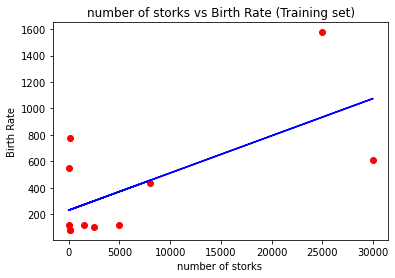

In [361]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('number of storks vs Birth Rate (Training set)')
plt.xlabel('number of storks ')
plt.ylabel('Birth Rate')
plt.show()

**b)	Use the bootstrap technique to estimate the distribution of the difference in the r2 parameter for the two models.**

# Resample Dataset

 Resample data points with replacement from the dataset of `x` inputs and
  `y` measurements.


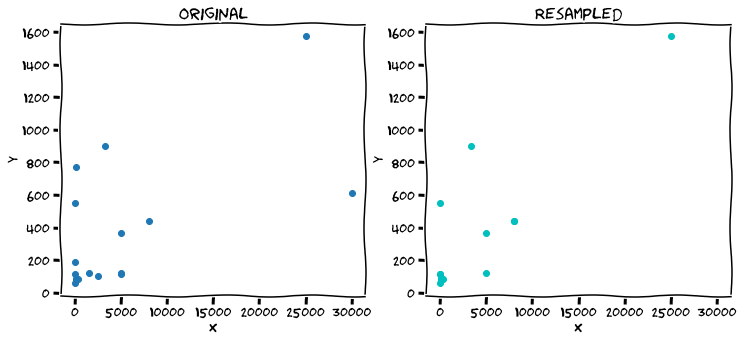

In [362]:
def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
  sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
  x_ = x[sample_]
  y_ = y[sample_]

  return x_, y_


with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  x_, y_ = resample_with_replacement(x, y)
  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# **models are fitted**

In [363]:
import statsmodels.api as sm

In [364]:
np.random.seed(123)
reg_fit11 = sm.OLS(x_, y_).fit()
reg_fit11.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              58.87
Date:                Thu, 06 May 2021   Prob (F-statistic):                    9.49e-07
Time:                        11:51:19   Log-Likelihood:                         -161.32
No. Observations:                  17   AIC:                                      324.6
Df Residuals:                      16   BIC:                                      325.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.3238      1.606      7.673      0.000       8.919      15.729
==============================================================================
Omnibus:                        2.734   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                0.988
Skew:                          -0.486   Prob(JB):                        0.610
Kurtosis:                       3.671   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The steps are repeated many times and a distribution of the differences is plotted**

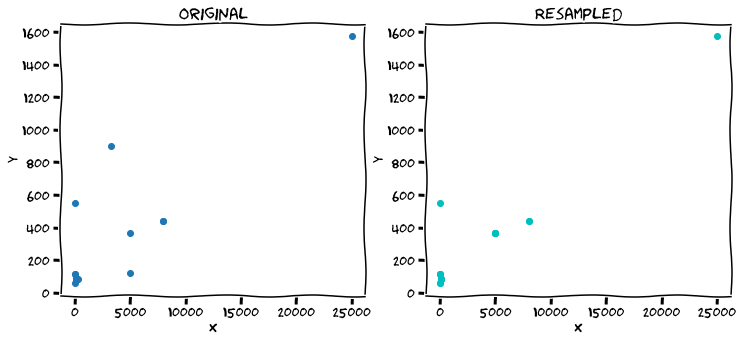

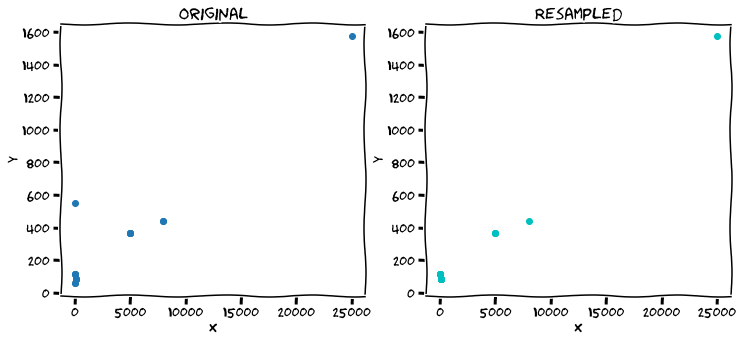

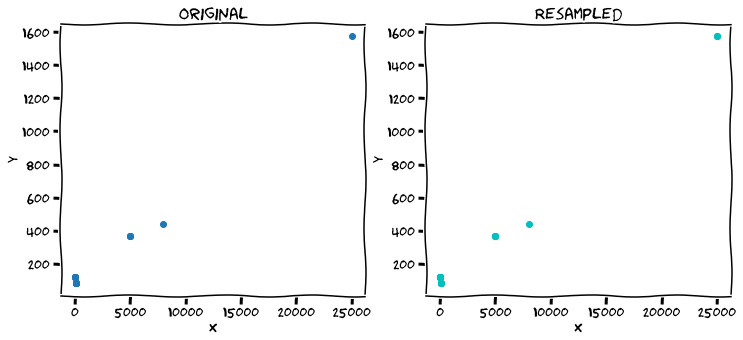

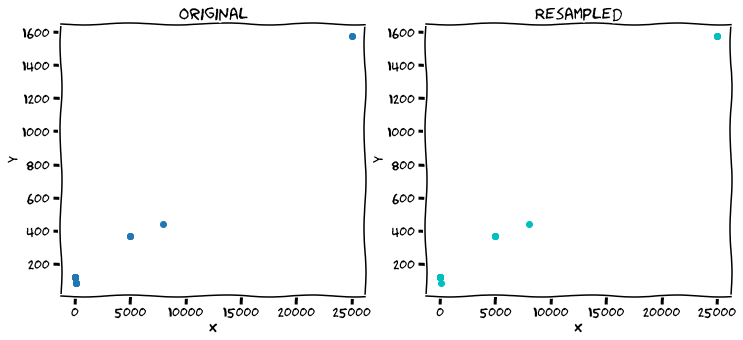

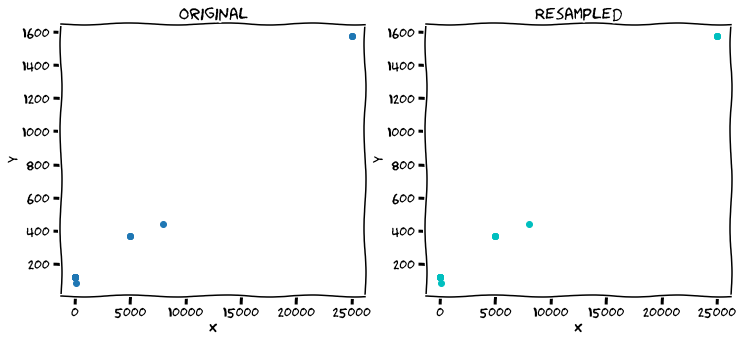

In [365]:
for i in range(5):

  x=x_
  y=y_

  def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
    sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
    x_ = x[sample_]
    y_ = y[sample_]

    return x_, y_


  with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(x, y)
    ax1.set(title='Original', xlabel='x', ylabel='y')

    x_, y_ = resample_with_replacement(x, y)
    ax2.scatter(x_, y_, color='c')

    ax2.set(title='Resampled', xlabel='x', ylabel='y',
            xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

In [366]:
np.random.seed(123)
reg_fit1 = sm.OLS(x_, y_).fit()
print(reg_fit1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1443.
Date:                Thu, 06 May 2021   Prob (F-statistic):                    4.14e-17
Time:                        11:51:30   Log-Likelihood:                         -146.16
No. Observations:                  17   AIC:                                      294.3
Df Residuals:                      16   BIC:                                      295.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


***MODEL-02***

In [367]:
x = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 3:4].values

**Splitting the dataset into the Training set and Test set**

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

**Training the Simple Linear Regression model on the Training set**

In [369]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Test set results**

In [370]:
y_pred = regressor.predict(X_test)

**Visualising the Training set results**

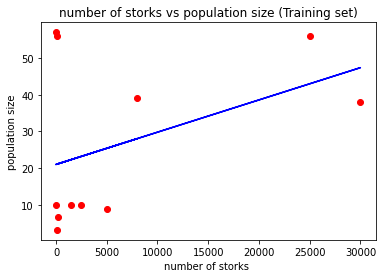

In [371]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('number of storks vs population size (Training set)')
plt.xlabel('number of storks ')
plt.ylabel('population size')
plt.show()

# Resample Dataset

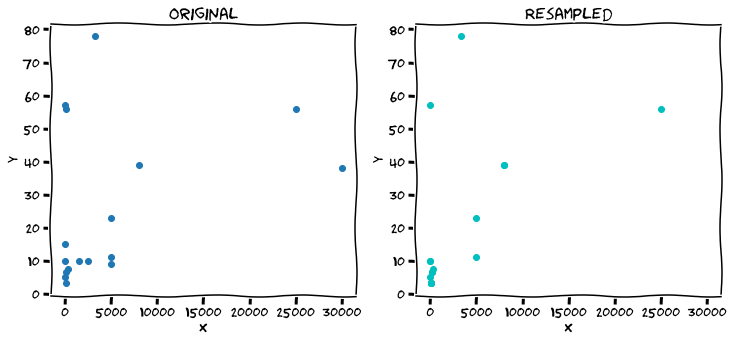

In [372]:
def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
  sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
  x_ = x[sample_]
  y_ = y[sample_]

  return x_, y_


with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  x_, y_ = resample_with_replacement(x, y)
  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# models are fitted

In [373]:
np.random.seed(123)
reg_fit22 = sm.OLS(x_, y_).fit()
print(reg_fit22)

In [374]:
reg_fit22.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              12.97
Date:                Thu, 06 May 2021   Prob (F-statistic):                     0.00240
Time:                        11:51:51   Log-Likelihood:                         -169.39
No. Observations:                  17   AIC:                                      340.8
Df Residuals:                      16   BIC:                                      341.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           148.2857     41.182      3.601      0.002      60.983     235.588
==============================================================================
Omnibus:                       16.785   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.012
Skew:                           1.475   Prob(JB):                     7.44e-05
Kurtosis:                       7.259   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**•	The steps are repeated many times and a distribution of the differences is plotted**

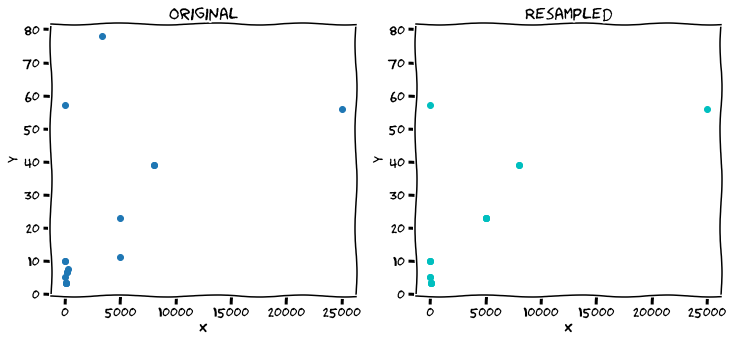

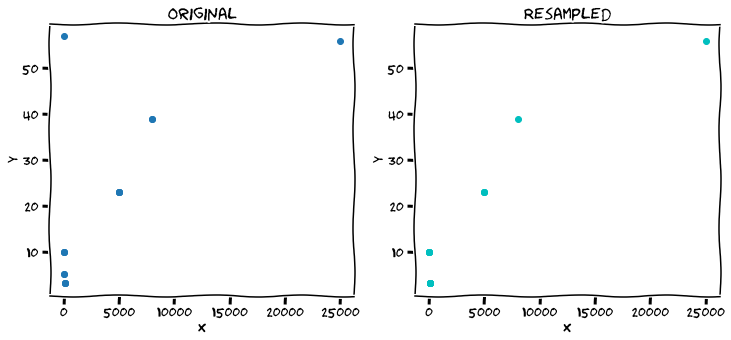

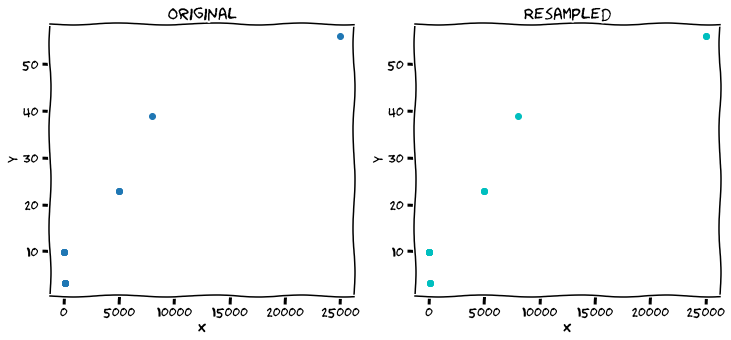

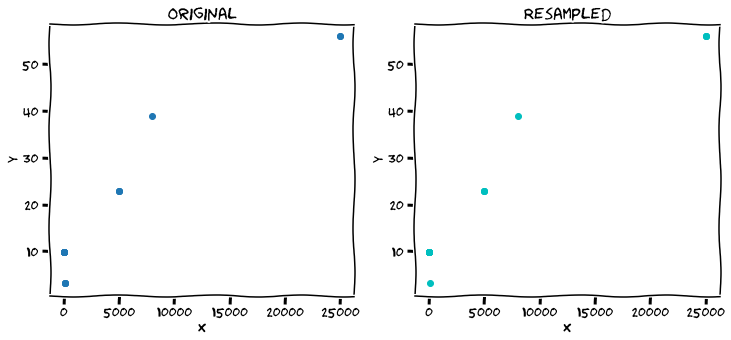

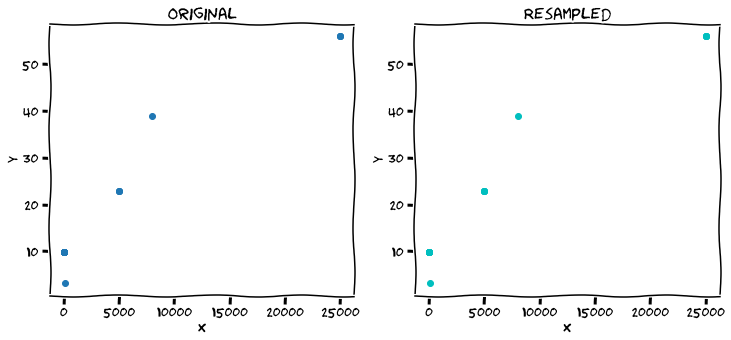

In [375]:
for i in range(5):

  x=x_
  y=y_

  def resample_with_replacement(x, y):
 

  # Get array of indices for resampled points
    sample_ = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_
    x_ = x[sample_]
    y_ = y[sample_]

    return x_, y_


  with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(x, y)
    ax1.set(title='Original', xlabel='x', ylabel='y')

    x_, y_ = resample_with_replacement(x, y)
    ax2.scatter(x_, y_, color='c')

    ax2.set(title='Resampled', xlabel='x', ylabel='y',
            xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

In [376]:
np.random.seed(123)
reg_fit2 = sm.OLS(x_, y_).fit()
print(reg_fit)

In [377]:
print(reg_fit2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              149.2
Date:                Thu, 06 May 2021   Prob (F-statistic):                    1.59e-09
Time:                        11:52:01   Log-Likelihood:                         -164.67
No. Observations:                  17   AIC:                                      331.3
Df Residuals:                      16   BIC:                                      332.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [378]:
print('Parameters: ', reg_fit2.params)
print('R2: ', reg_fit2.rsquared)

Parameters:  [377.5713843]
R2:  0.9031617159816934


In [379]:
print('R1 for model one: ', reg_fit11.rsquared)
print('R2 for model two: ', reg_fit22.rsquared)

R1 for model one:  0.7862942100569508
R2 for model two:  0.44761221554957287


model one R2 is lager than modal two R2 hence First model is good

**Estimate appropriate confidence intervals for the difference in the r2 values.**

**By default, it is a 95% confidence level**

In [388]:
print(reg_fit11.conf_int(0.05))

[[ 8.91880223 15.72879527]]


In [389]:
print(reg_fit22.conf_int(0.05))

[[ 60.98316858 235.58820413]]


The confidence interval is 8.92 and 15.728 which is a very narrow range.compare with second model .hence first one  was best. 